# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [ ]:
17

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import time


In [147]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [148]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [149]:
# drop null values, describe the data, separate features and target variable, and encode categorical variables
df.dropna()
df.describe()
X = df.drop('y', axis=1)
X['contact'] = X['contact'].map({'cellular': 1, 'telephone': 0})
y = df['y'].map({'yes': 1, 'no': 0})


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



In [150]:
print("Predict if the customer will subscribe to a term deposit based on the given features")

Predict if the customer will subscribe to a term deposit based on the given features


In [151]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [152]:
#use onehot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   contact                        41188 non-null  int64  
 2   duration                       41188 non-null  int64  
 3   campaign                       41188 non-null  int64  
 4   pdays                          41188 non-null  int64  
 5   previous                       41188 non-null  int64  
 6   emp.var.rate                   41188 non-null  float64
 7   cons.price.idx                 41188 non-null  float64
 8   cons.conf.idx                  41188 non-null  float64
 9   euribor3m                      41188 non-null  float64
 10  nr.employed                    41188 non-null  float64
 11  job_blue-collar                41188 non-null  bool   
 12  job_entrepreneur               41188 non-null 

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [153]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [156]:
# baseline performance using a dummy classifier
from sklearn.dummy import DummyClassifier  
dummy_clf = DummyClassifier()
start = time.perf_counter()
dummy_clf.fit(X_train, y_train)
end = time.perf_counter()
dummy_time = end - start
dummy_clf_trainScore = dummy_clf.score(X_train, y_train)
dummy_clf_testScore = dummy_clf.score(X_test, y_test)

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [ ]:

# build a pipeline with a standard scaler and a logistic regression model
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression(max_iter=1000))])
start = time.perf_counter()
pipe.fit(X_train, y_train)
end = time.perf_counter()
lr_time = end - start
Lrpipe_train_score = pipe.score(X_train, y_train)


### Problem 9: Score the Model

What is the accuracy of your model?

In [174]:
lrpipe_test_score = pipe.score(X_test, y_test)



### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [164]:
# pipeline with standard scaler and KNN classifier

from sklearn.feature_selection import SelectKBest, f_classif
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(f_classif, k=20)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])
start =time.perf_counter()
pipe_knn.fit(X_train, y_train)
end = time.perf_counter()
knn_time = end - start
knn_train_score = pipe_knn.score(X_train, y_train)
knn_test_score = pipe_knn.score(X_test, y_test)


In [168]:
# pipeline with standard scaler and decision tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
pipe_dt = Pipeline([('scaler', StandardScaler()),
                   ('decision_tree', dt)])
start = time.perf_counter()
pipe_dt.fit(X_train, y_train)
end = time.perf_counter()
dt_time = end - start
dt_train_score = pipe_dt.score(X_train, y_train)
dt_test_score = pipe_dt.score(X_test, y_test)

In [172]:
# pipeline with standard scaler and SVM
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
pipe_svm = Pipeline([('scaler', StandardScaler()),
                     ('svm', svm)])
start=time.perf_counter()
pipe_svm.fit(X_train, y_train)
end = time.perf_counter()
svm_train_time = end-start
pipe_svm_trainscore = pipe_svm.score(X_train, y_train)
svm_test_score = pipe_svm.score(X_test, y_test)

                 Model Train Time (s) Train Accuracy Test Accuracy
0     Dummy Classifier         0.0015         0.8876        0.8865
1  Logistic Regression         0.2405         0.9116        0.9115
2                  KNN         0.1745         0.9338        0.9028
3        Decision Tree         0.1729         0.9174        0.9150
4                  SVM        33.3946         0.9256        0.9084


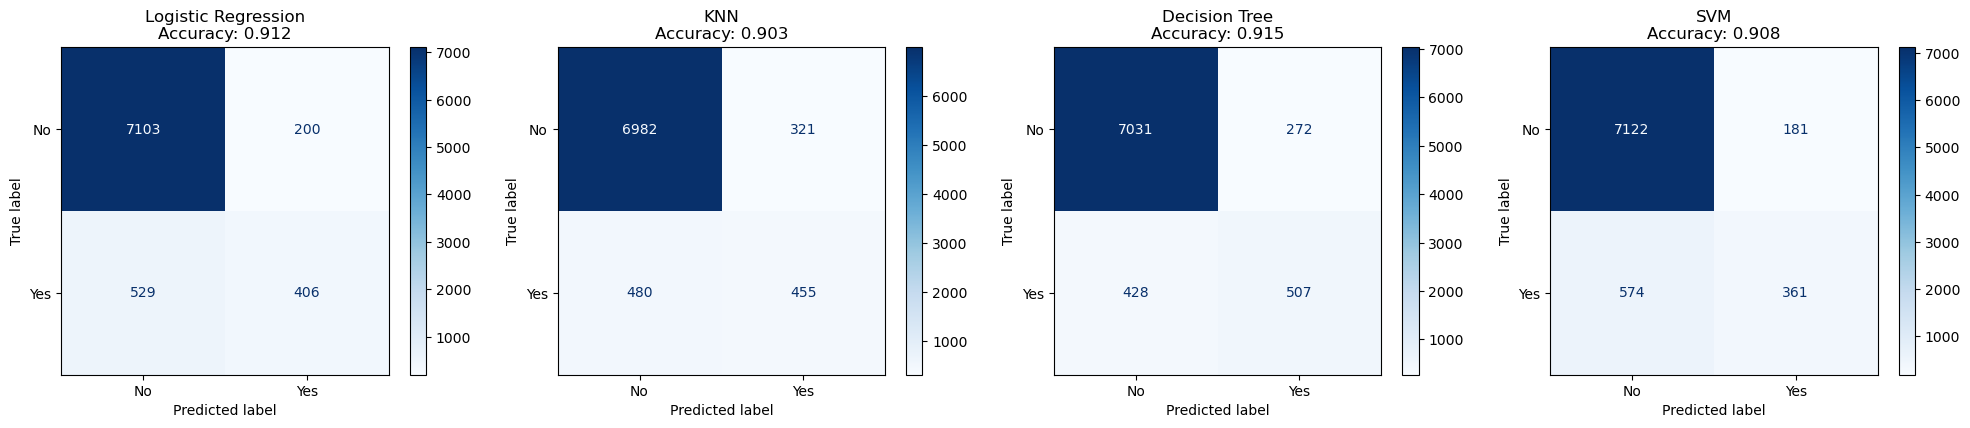

In [177]:
#compare the models side by side
#create a table with Model Name, Training Accuracy, Test Accuracy, Training Time
# Create comparison table
results = []
results.append({
    'Model': 'Dummy Classifier',
    'Train Time (s)': f'{dummy_time:.4f}',
    'Train Accuracy': f'{dummy_clf_trainScore:.4f}',
    'Test Accuracy': f'{dummy_clf_testScore:.4f}'
})
results.append({
    'Model': 'Logistic Regression',
    'Train Time (s)': f'{lr_time:.4f}',
    'Train Accuracy': f'{pipe_train_score:.4f}',
    'Test Accuracy': f'{lrpipe_test_score:.4f}'
})
results.append({
    'Model': 'KNN',
    'Train Time (s)': f'{knn_time:.4f}',
    'Train Accuracy': f'{knn_train_score:.4f}',
    'Test Accuracy': f'{knn_test_score:.4f}'
})
results.append({
    'Model': 'Decision Tree',
    'Train Time (s)': f'{dt_time:.4f}',
    'Train Accuracy': f'{dt_train_score:.4f}',
    'Test Accuracy': f'{dt_test_score:.4f}'
})
results.append({
    'Model': 'SVM',
    'Train Time (s)': f'{svm_train_time:.4f}',
    'Train Accuracy': f'{pipe_svm_trainscore:.4f}',
    'Test Accuracy': f'{svm_test_score:.4f}'
})

comparison_df = pd.DataFrame(results)
print(comparison_df)

# now compare confusion matrices side by side
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

models = [
    ('Logistic Regression', pipe, pipe.predict(X_test)),
    ('KNN', pipe_knn, pipe_knn.predict(X_test)),
    ('Decision Tree', pipe_dt, pipe_dt.predict(X_test)),
    ('SVM', pipe_svm, pipe_svm.predict(X_test))
]

for ax, (name, model, predictions) in zip(axes, models):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
    disp.plot(ax=ax, cmap='Blues')
    ax.set_title(f'{name}\nAccuracy: {model.score(X_test, y_test):.3f}')

plt.tight_layout()
plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [ ]:
#logistic regression features with their coefficients
lr_model = pipe.named_steps['logistic_regression']
coefficients = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lr_model.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False)
print(coefficients.head(10))  # Top 10 most influential features


           feature  coefficient
6     emp.var.rate    -2.697518
2         duration     1.206449
7   cons.price.idx     1.205355
9        euribor3m     0.666009
1          contact     0.319574
38       month_aug     0.304912
10     nr.employed     0.289237
42       month_mar     0.235295
43       month_may    -0.229184
4            pdays    -0.184797


In [179]:
# knn selected features
selector = pipe_knn.named_steps['feature_selection']
mask = selector.get_support()
selected_features = X_train.columns[mask].tolist()
print("Selected features:", selected_features)

Selected features: ['contact', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed', 'job_blue-collar', 'job_retired', 'job_student', 'default_unknown', 'month_dec', 'month_mar', 'month_may', 'month_oct', 'month_sep', 'poutcome_nonexistent', 'poutcome_success']


In [180]:
# Grid search for the best number of neighbors for KNN
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 15, 20, 25, 30]
}

# Create pipeline
pipe_knn_grid = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(f_classif, k=20)),
    ('knn', KNeighborsClassifier())
])

# Perform grid search
grid_search = GridSearchCV(pipe_knn_grid, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best number of neighbors: {grid_search.best_params_['knn__n_neighbors']}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
print(f"Test accuracy with best params: {grid_search.score(X_test, y_test):.4f}")

Best number of neighbors: 20
Best cross-validation score: 0.9099
Test accuracy with best params: 0.9063


In [ ]:
# Grid search for the best hyperparameters for SVM
from sklearn.model_selection import GridSearchCV

# Define parameter grid for SVM
param_grid_svm = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'svm__kernel': ['rbf', 'linear']
}

# Create pipeline
pipe_svm_grid = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42))
])

# Perform grid search
grid_search_svm = GridSearchCV(pipe_svm_grid, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
print("Starting SVM grid search (this may take a while)...")
grid_search_svm.fit(X_train, y_train)

# Best parameters and scores
print(f"\nBest parameters: {grid_search_svm.best_params_}")
print(f"Best cross-validation score: {grid_search_svm.best_score_:.4f}")
print(f"Test accuracy with best params: {grid_search_svm.score(X_test, y_test):.4f}")

Starting SVM grid search (this may take a while)...
Fitting 5 folds for each of 48 candidates, totalling 240 fits


##### Questions